[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/drive/1h8GGCyFFTPQsojgLB9LjWpT3J1-aBRNR#scrollTo=lafc9ss5-syo)

# Problem 3

Use this notebook to write your code for problem 3.

In [42]:
import numpy as np
from matplotlib import pyplot as plt
from numpy import genfromtxt
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
%matplotlib inline

## Load data

In [43]:
import requests

url_dict = {
    'problem3data.txt': 'https://drive.google.com/uc?export=download&id=1DPF-C43F2JuWxtHvkTP99w5r9QNHxd70',
}

def download_file(file_path):
    url = url_dict[file_path]
    print('Start downloading...')
    with requests.get(url, stream=True) as r:
        r.raise_for_status()
        with open(file_path, 'wb') as f:
            for chunk in r.iter_content(chunk_size=1024 * 1024 * 1024):
                f.write(chunk)
    print('Complete')

In [44]:
train_file = 'problem3data.txt'
download_file(train_file)
train_data = genfromtxt(train_file, delimiter='\t')

y_train = train_data[:, 9]
X_train = train_data[:, :9]

Start downloading...
Complete


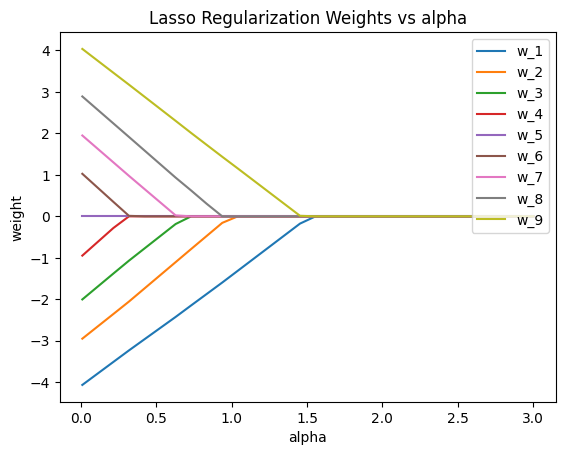

In [45]:
Lasso_weights = np.zeros((30, 9))
alphas = np.linspace(0.01, 3, 30)
i = 0
for alpha in alphas:
  lasso = Lasso(alpha=alpha)
  lasso.fit(X_train, y_train)
  Lasso_weights[i] = lasso.coef_
  i += 1

plt.figure()
for i in range(9):
  weight_num = f"w_{i+1}"
  plt.plot(alphas, Lasso_weights[:, i], label = weight_num)
plt.title("Lasso Regularization Weights vs alpha")
plt.xlabel("alpha")
plt.ylabel("weight")
plt.legend(loc = 'upper right')
plt.show()


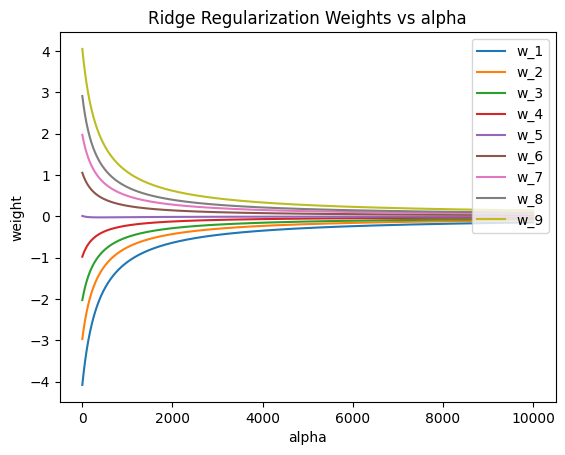

In [51]:
Ridge_weights = np.zeros((10**4, 9))
alphas = np.arange(1, 10**4 + 1)
i = 0
for alpha in alphas:
  ridge = Ridge(alpha=alpha)
  ridge.fit(X_train, y_train)
  Ridge_weights[i] = ridge.coef_
  i += 1

plt.figure()
for j in range(9):
  weight_num = f"w_{j+1}"
  plt.plot(alphas, Ridge_weights[:, j], label = weight_num)
plt.title("Ridge Regularization Weights vs alpha")
plt.xlabel("alpha")
plt.ylabel("weight")
plt.legend(loc = 'upper right')
plt.show()